# Analyse the Meteorological Data (precipitation and Evapotranspiration ) for the last 2 decades in california.

# We will go through 4 tasks to implement our project:

## Task1:Import the important library and exploring the dataset.

## Task2:  analyze the data

## Task3:  Drought Analysis

## Task4: Forecasting

## Task1: Import the important library and exploring the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv("MeterologicalData_Californial.csv")

In [3]:
#checking the head of the data
df.head()

,datetime,time,pr,pet
0,1/1/2000,9.466850e+11,77.156726,90.67500
1,2/1/2000,9.493630e+11,81.949747,62.47500
2,3/1/2000,9.518690e+11,41.031798,129.61875
3,4/1/2000,9.545470e+11,32.120712,150.37500
4,5/1/2000,9.571390e+11,7.028324,253.03750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  228 non-null    object 
 1   time      228 non-null    float64
 2   pr        228 non-null    float64
 3   pet       226 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.2+ KB


Identifying Missing Data and dealing with them

In [5]:
# Check for the null values 
df.isna().apply(pd.value_counts)

,datetime,time,pr,pet
False,228.0,228.0,228.0,226
True,NaN,NaN,NaN,2


### Interpolation:

Wou can use interpolation techniques to estimate missing values based on neighboring data points. The Pandas interpolate() method is useful for this:

In [6]:
df['pet'].interpolate(method='linear', inplace=True)

In [7]:
df.isna().apply(pd.value_counts)

,datetime,time,pr,pet
False,228,228,228,228


## Task2:Creating visual methods to analyze the data

In [8]:
#check the correlation of the data
df.corr()

C:\Users\hesha\AppData\Local\Temp\ipykernel_7052\1004517442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,time,pr,pet
time,1.000000,-0.037804,0.009038
pr,-0.037804,1.000000,-0.608145
pet,0.009038,-0.608145,1.000000


In [9]:
# a brief summary for the dataset
df.describe()

,time,pr,pet
count,2.280000e+02,228.000000,228.000000
mean,1.245141e+12,20.307739,165.807369
std,1.734658e+11,26.124442,71.559975
min,9.466850e+11,0.000000,37.006250
25%,1.095942e+12,0.000000,95.545312
50%,1.245110e+12,10.083091,163.960938
75%,1.394300e+12,29.202551,239.582812
max,1.543620e+12,133.818808,277.837500


Convert the "datetime" Column to a Datetime Data Type

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,time,pr,pet
0,2000-01-01,9.466850e+11,77.156726,90.675000
1,2000-02-01,9.493630e+11,81.949747,62.475000
2,2000-03-01,9.518690e+11,41.031798,129.618750
3,2000-04-01,9.545470e+11,32.120712,150.375000
4,2000-05-01,9.571390e+11,7.028324,253.037500
...,...,...,...,...
223,2018-08-01,1.533080e+12,0.394160,249.937500
224,2018-09-01,1.535760e+12,0.000000,197.343750
225,2018-10-01,1.538350e+12,6.866144,171.662500
226,2018-11-01,1.541030e+12,36.376344,103.968750


Set the "datetime" Column as the Index:

For time series analysis, it's beneficial to set the "datetime" column as the index of your DataFrame. This allows for time-based indexing and easier manipulation of time series data

In [11]:
df.set_index('datetime', inplace=True)

### Visualize the Time Series Data:

Start by visualizing your time series data to get a sense of its behavior over time. You can use libraries like Matplotlib or Seaborn for this purpose:

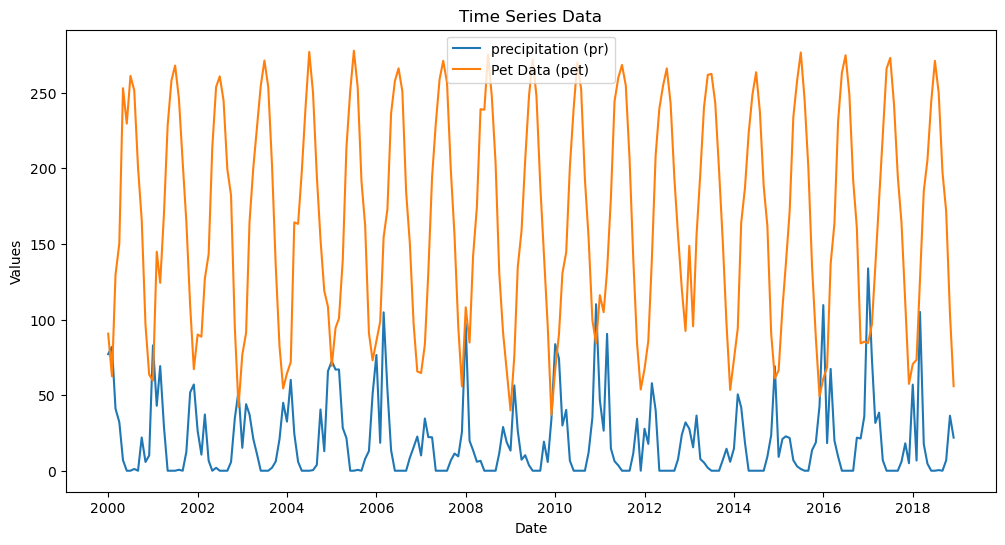

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pr'], label='precipitation (pr)')
plt.plot(df.index, df['pet'], label='Pet Data (pet)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend()
plt.show()

### Stationarity Test:

Many time series analyses assume that the data is stationary (mean and variance remain constant over time). You can use statistical tests like the Augmented Dickey-Fuller (ADF) test to check for stationarity:

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['pr'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
#A low p-value suggests that the data is stationary.

ADF Statistic: -2.9845391332966065
p-value: 0.03636369480782651


### Decompose the Time Series:

Decomposition helps you understand the underlying components of your time series, such as trend, seasonality, and residual (random noise). You can use the seasonal_decompose function from the statsmodels library for this:

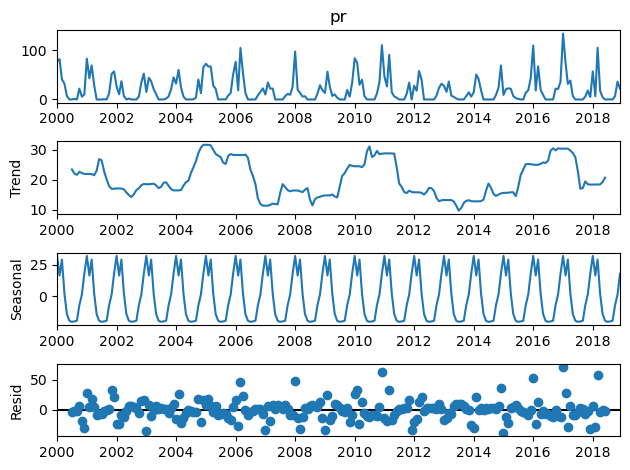

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['pr'], model='additive')
decomposition.plot()
plt.show()


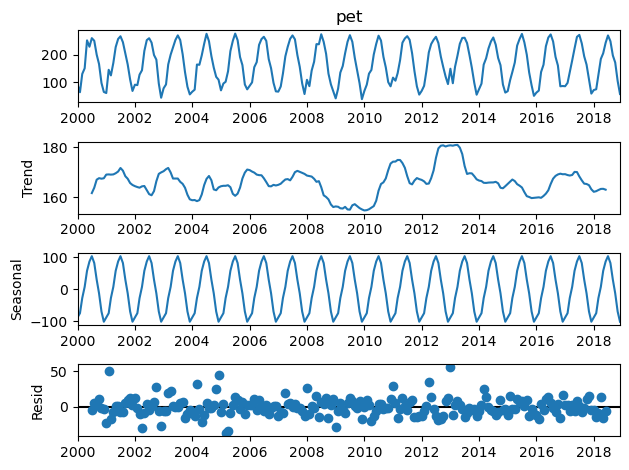

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['pet'], model='additive')
decomposition.plot()
plt.show()

### Calculate the Correlation Matrix:

You can use the Pandas corr() method to calculate the correlation matrix for your numerical columns. This matrix will show the pairwise correlations between all pairs of variables. The values range from -1 to 1, where:

 1 indicates a perfect positive correlation
-1 indicates a perfect negative correlation
 0 indicates no correlation

In [16]:
correlation_matrix = df.corr()


### Visualize the Correlation Matrix:

Visualizing the correlation matrix can provide a quick overview of the relationships between variables. Heatmaps are commonly used for this purpose. You can use libraries like Seaborn or Matplotlib to create the heatmap:

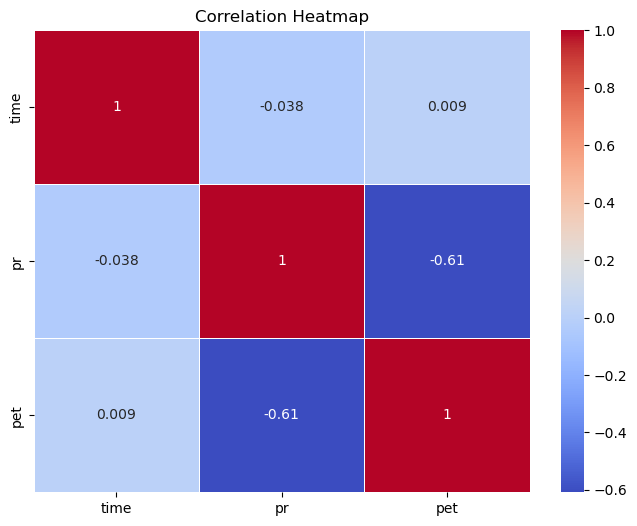

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### Autocorrelation Plot:

Create an autocorrelation plot to examine the correlation of Evapotranspiration and Precipitation with its lagged values, which can help identify potential seasonality.

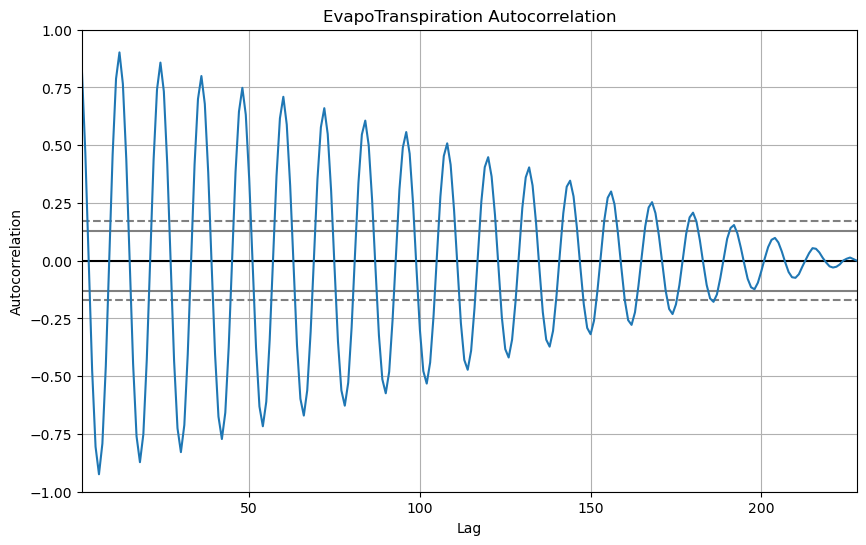

In [18]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['pet'])
plt.title('EvapoTranspiration Autocorrelation')
plt.show()


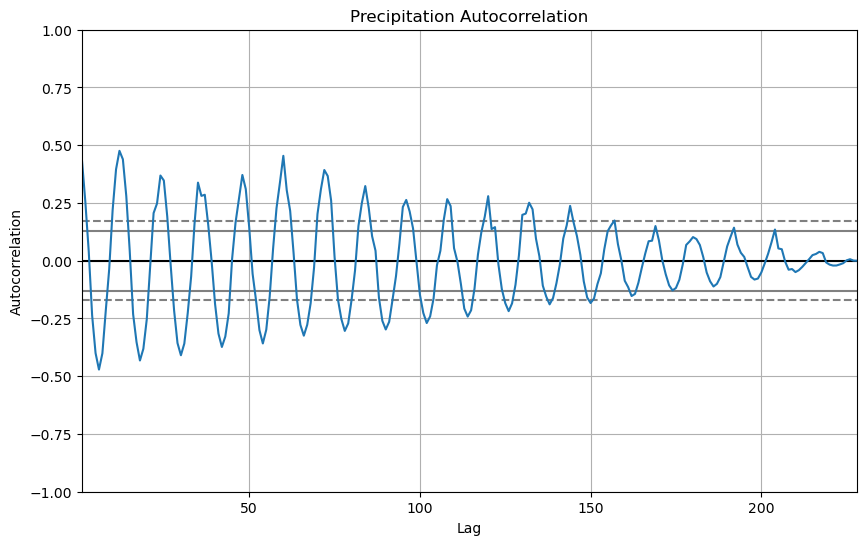

In [19]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['pr'])
plt.title('Precipitation Autocorrelation')
plt.show()


## Box Plot by Month:

Create a box plot to visualize the distribution of transpiration data for each month.

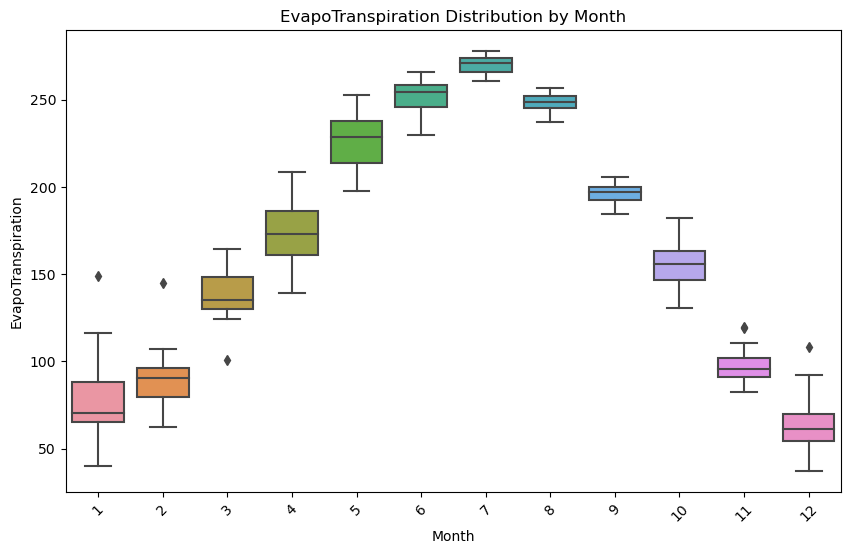

In [20]:
df['Month'] = df.index.month  # Create a 'Month' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='pet', data=df)
plt.xlabel('Month')
plt.ylabel('EvapoTranspiration')
plt.title('EvapoTranspiration Distribution by Month')
plt.xticks(rotation=45)
plt.show()


Box Plot by Month:

Create a box plot to visualize the distribution of Precipitation data for each month.

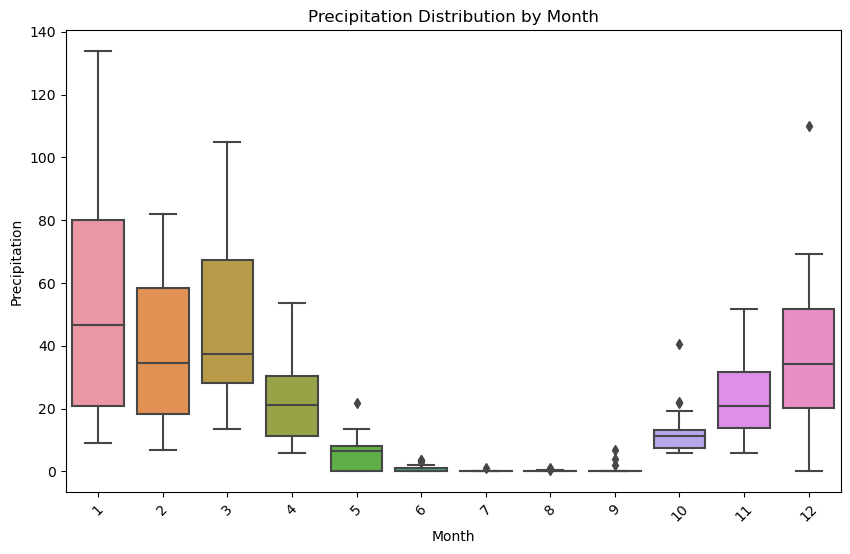

In [21]:
df['Month'] = df.index.month  # Create a 'Month' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='pr', data=df)
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.title('Precipitation Distribution by Month')
plt.xticks(rotation=45)
plt.show()


Seasonal decomposition is a technique used to break down time series data into its constituent components, including the trend, seasonal, and residual components. In our case, we can use seasonal decomposition to understand the seasonal patterns in our EvapoTranspiration and Precipitation data. Here's how we can perform seasonal decomposition using Python and visualize the results:

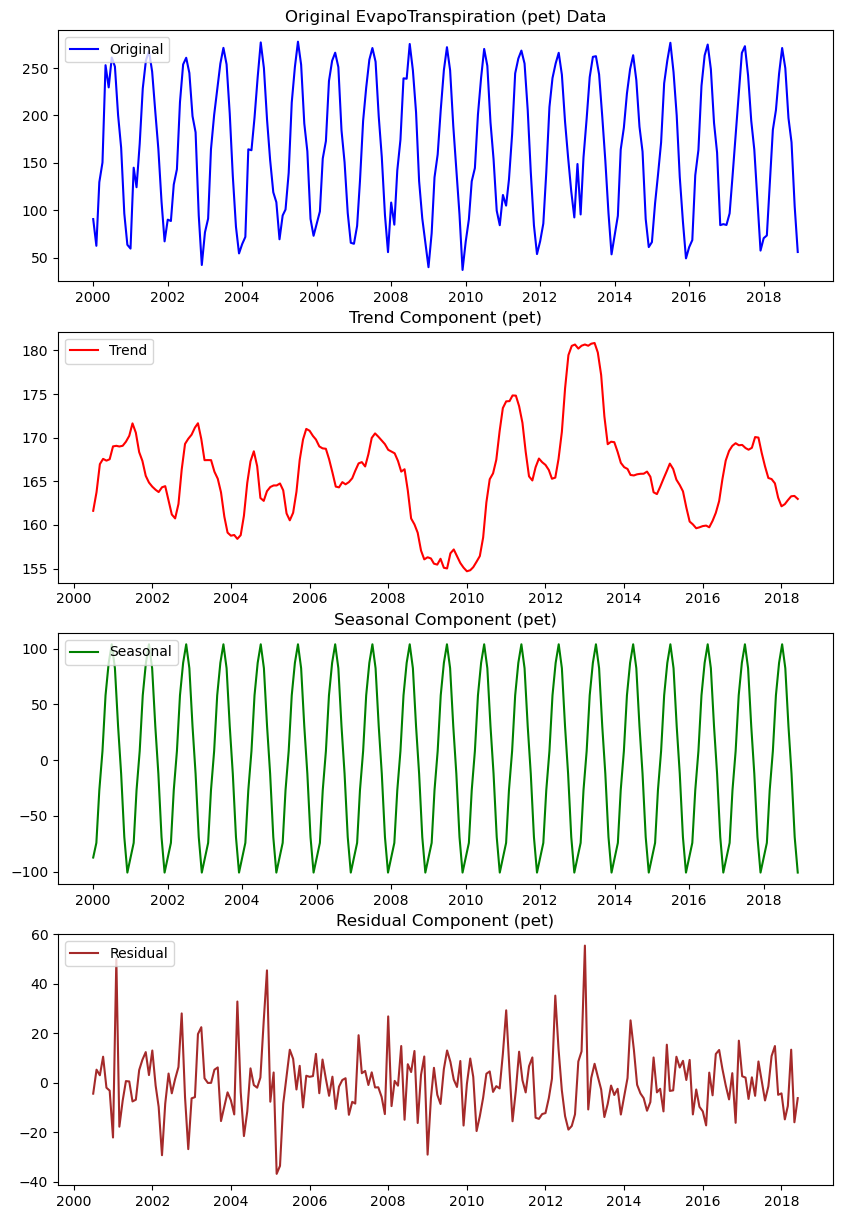

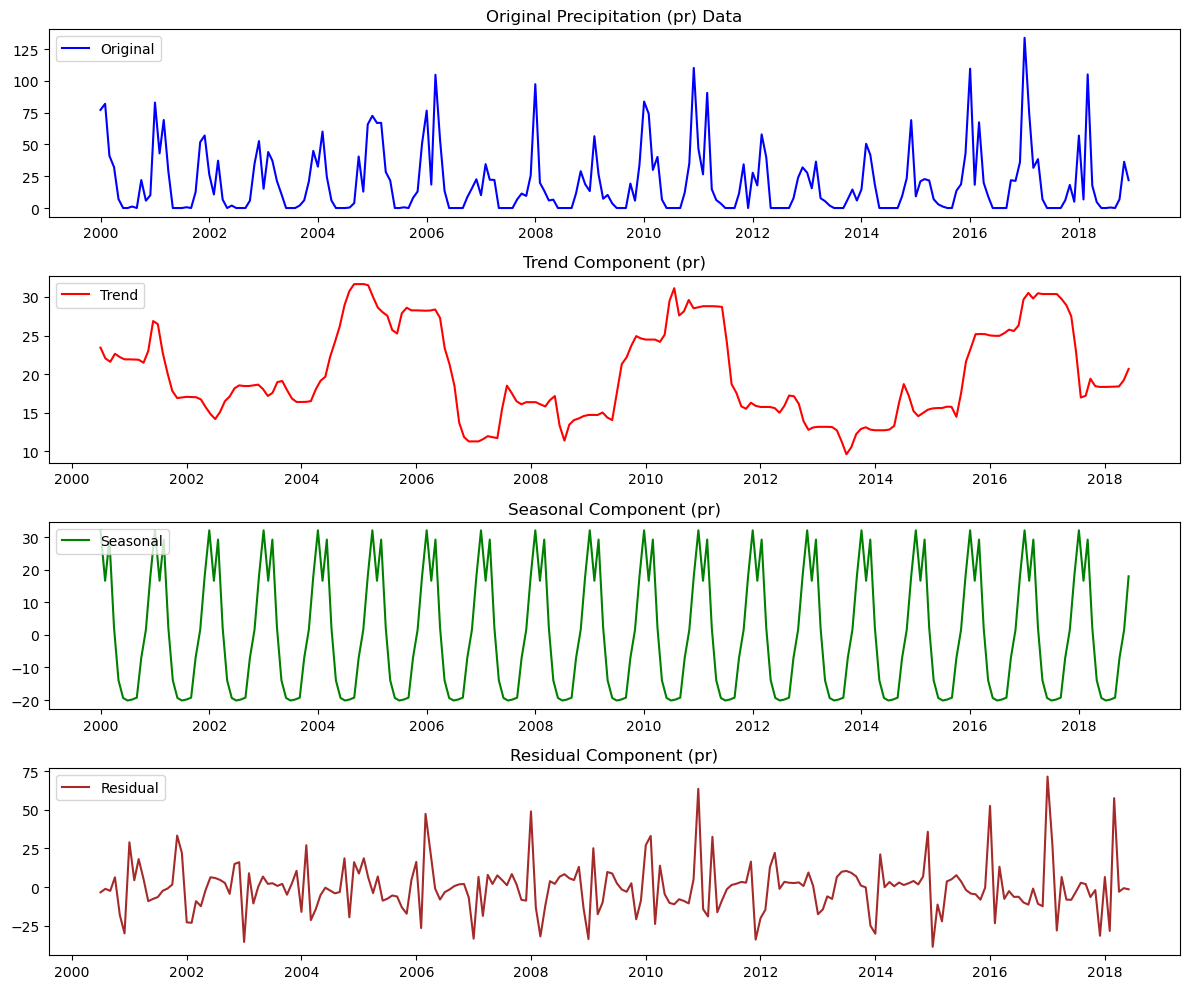

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame has 'datetime' as the index
# Ensure the 'datetime' column is in datetime format
df.index = pd.to_datetime(df.index)

# Perform seasonal decomposition for 'pet'
decomposition_pet = seasonal_decompose(df['pet'], model='additive', period=12)  # Assuming a yearly seasonal pattern

# Perform seasonal decomposition for 'pr'
decomposition_pr = seasonal_decompose(df['pr'], model='additive', period=12)  # Assuming a yearly seasonal pattern

# Create subplots for 'pet' and 'pr'
plt.figure(figsize=(10, 15))

# Plot 'pet' decomposition
plt.subplot(411)
plt.plot(df.index, df['pet'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original EvapoTranspiration (pet) Data')
plt.subplot(412)
plt.plot(df.index, decomposition_pet.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component (pet)')
plt.subplot(413)
plt.plot(df.index, decomposition_pet.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component (pet)')
plt.subplot(414)
plt.plot(df.index, decomposition_pet.resid, label='Residual', color='brown')
plt.legend(loc='upper left')
plt.title('Residual Component (pet)')

# Create subplots for 'pr' decomposition
plt.figure(figsize=(12, 10))

# Plot 'pr' decomposition
plt.subplot(411)
plt.plot(df.index, df['pr'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Precipitation (pr) Data')
plt.subplot(412)
plt.plot(df.index, decomposition_pr.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component (pr)')
plt.subplot(413)
plt.plot(df.index, decomposition_pr.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component (pr)')
plt.subplot(414)
plt.plot(df.index, decomposition_pr.resid, label='Residual', color='brown')
plt.legend(loc='upper left')
plt.title('Residual Component (pr)')

plt.tight_layout()
plt.show()


### Comparative Statistics:

Calculate summary statistics for both "pr" and "pet" separately and compare them. This can include mean, median, standard deviation, and percentiles.

In [23]:
pr_statistics = df['pr'].describe()
pet_statistics = df['pet'].describe()
print("Statistics for 'pr':\n", pr_statistics)
print("\nStatistics for 'pet':\n", pet_statistics)


Statistics for 'pr':
 count    228.000000
mean      20.307739
std       26.124442
min        0.000000
25%        0.000000
50%       10.083091
75%       29.202551
max      133.818808
Name: pr, dtype: float64

Statistics for 'pet':
 count    228.000000
mean     165.807369
std       71.559975
min       37.006250
25%       95.545312
50%      163.960938
75%      239.582812
max      277.837500
Name: pet, dtype: float64


## Task3: Drought Analysis
Drought analysis involves assessing and monitoring the impact of drought conditions on various environmental factors, including variables like precipitation ("pr") and transpiration ("pet"). It helps in understanding the severity, duration, and spatial distribution of drought events and their potential consequences. Here's how we can perform a basic drought analysis:

1) Drought Index Calculation:

Calculate a drought index based on the ratio of precipitation to Evapotranspiration. Common drought indices include the Standardized Precipitation Index (SPI) or the Palmer Drought Severity Index (PDSI). Choose an appropriate index for your analysis.


2) Threshold Definition:

Define drought thresholds for your chosen index. These thresholds categorize drought severity levels (e.g., mild, moderate, severe, extreme) based on the index values.


3) Drought Classification:

Classify each time period (e.g., month or year) based on the calculated drought index and thresholds. Identify periods of drought and their severity levels.

In [24]:
pr_data = df['pr'] + 0.01  # Add a small constant to avoid zero values

The gamma distribution requires that (x - loc)/scale > 0 for each data point. So, we can consider adding a small constant (e.g., 0.01) to avoid division by zero when fitting the gamma distribution.

Drought Classification Summary:
Mild: 4 months
Moderate: 2 months
Severe: 2 months
Extreme: 2 months


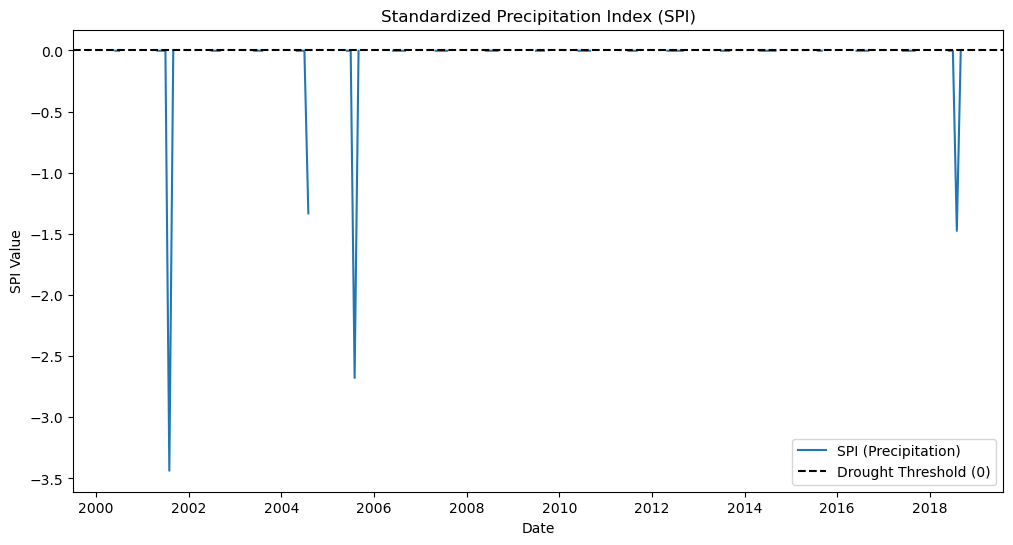

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Assuming your DataFrame has 'datetime' as the index
# Ensure the 'datetime' column is in datetime format
df.index = pd.to_datetime(df.index)

# Calculate SPI for precipitation data ('pr')
# You may need to customize the parameters for your specific dataset
def calculate_spi(pr_data, scale=1, shape=2):
    # Calculate the gamma distribution parameters
    params = gamma.fit(pr_data, floc=0)
    
    # Calculate SPI values
    spi_values = np.zeros_like(pr_data, dtype=float)
    for i in range(len(pr_data)):
        if pr_data[i] > 0:
            spi_values[i] = -1 * (gamma.ppf(pr_data[i], *params) / scale) ** (1 / shape)
        else:
            spi_values[i] = -999  # Missing value
        
    return spi_values


# Calculate SPI for 'pr' data with the small constant
spi_pr = calculate_spi(pr_data)

# Rest of the code for drought analysis
# Define drought thresholds (customize based on your needs)
thresholds = {
    'Mild': -1.0,
    'Moderate': -1.5,
    'Severe': -2.0,
    'Extreme': -2.5
}

# Classify drought severity based on thresholds
drought_classification = {}
for key, value in thresholds.items():
    drought_classification[key] = (spi_pr <= value).sum()

# Plot SPI values and drought classification
plt.figure(figsize=(12, 6))
plt.plot(df.index, spi_pr, label='SPI (Precipitation)')
plt.axhline(0, color='black', linestyle='--', label='Drought Threshold (0)')
plt.xlabel('Date')
plt.ylabel('SPI Value')
plt.title('Standardized Precipitation Index (SPI)')
plt.legend()

# Print drought classification summary
print('Drought Classification Summary:')
for key, value in drought_classification.items():
    print(f'{key}: {value} months')

plt.show()



This code calculates the Standardized Precipitation Index (SPI) for "pr" data, defines drought thresholds, and classifies drought severity.

## Task4 :Forecasting
Forecasting involves predicting future values of a time series based on historical data. In our case, we can perform forecasting for both "pr" (precipitation) and "pet" (transpiration) data separately. Here, a basic example of how to perform time series forecasting using a simple method known as Exponential Smoothing. More advanced methods like ARIMA, Prophet, or machine learning models can also be applied for forecasting.

C:\Users\hesha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


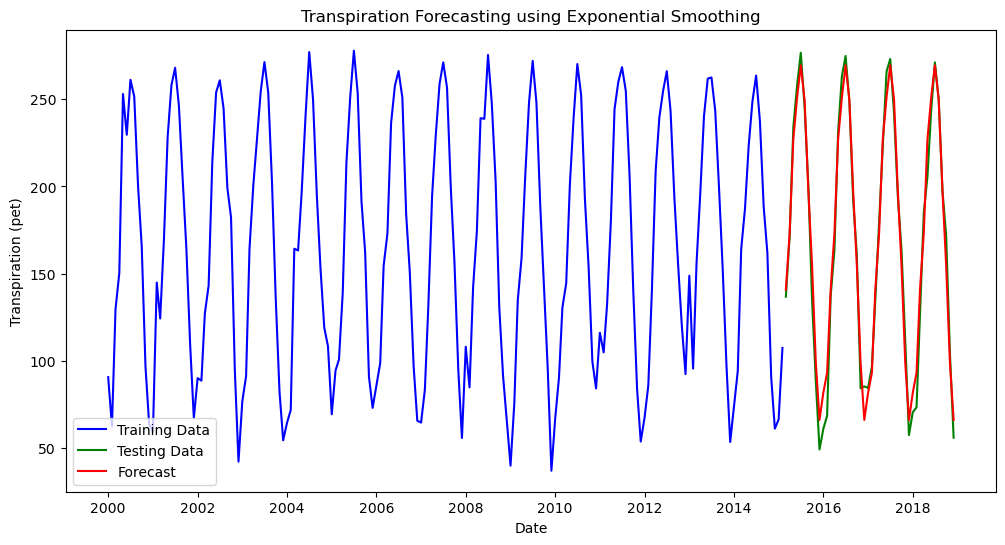

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df.index = pd.to_datetime(df.index)

# Split data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df['pet'][:train_size]
test_data = df['pet'][train_size:]

# Fit Exponential Smoothing model
model_pet = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
model_pet_fit = model_pet.fit()

# Forecast future values
forecast_pet = model_pet_fit.forecast(steps=len(test_data))

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_data, label='Training Data', color='blue')
plt.plot(df.index[train_size:], test_data, label='Testing Data', color='green')
plt.plot(df.index[train_size:], forecast_pet, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Transpiration (pet)')
plt.title('Transpiration Forecasting using Exponential Smoothing')
plt.legend()
plt.show()


C:\Users\hesha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


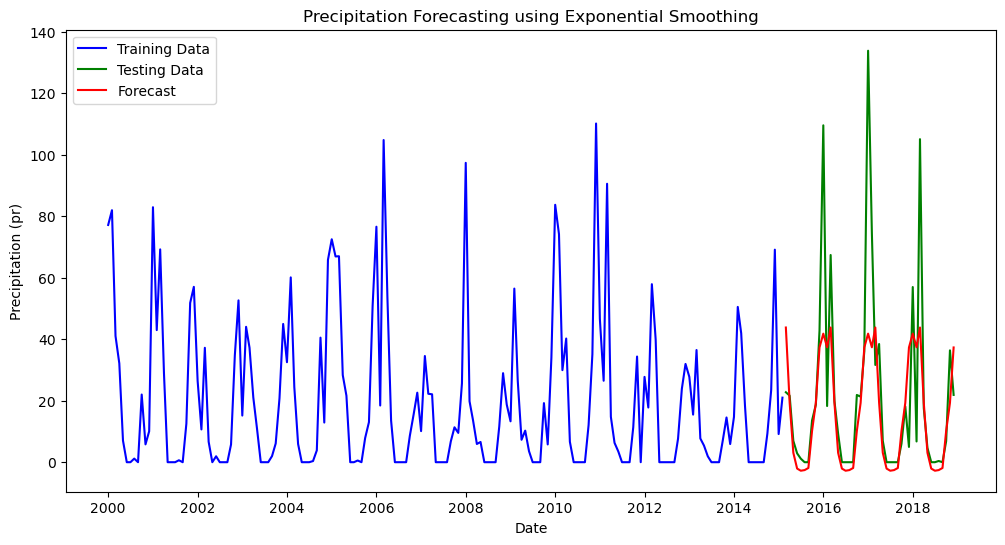

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df.index = pd.to_datetime(df.index)

# Split data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df['pr'][:train_size]
test_data = df['pr'][train_size:]

# Fit Exponential Smoothing model
model_pr = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
model_pr_fit = model_pr.fit()

# Forecast future values
forecast_pr = model_pr_fit.forecast(steps=len(test_data))

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_data, label='Training Data', color='blue')
plt.plot(df.index[train_size:], test_data, label='Testing Data', color='green')
plt.plot(df.index[train_size:], forecast_pr, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Precipitation (pr)')
plt.title('Precipitation Forecasting using Exponential Smoothing')
plt.legend()
plt.show()


This code splits the data into training and testing sets, fits an Exponential Smoothing model to the training data, and then uses the model to forecast future values. The results are plotted along with the training and testing data.

We can explore more advanced forecasting techniques, including ARIMA or machine learning models, depending on the complexity and characteristics of our data.